# MBTI  Preprocessing and Analysis

In [60]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter

#other
import json

In [61]:
sns.set()

## Data Exploration

In [62]:
DATASETS_PATH = "../datasets/"

In [63]:
df = pd.read_csv(f"{DATASETS_PATH}mbti_1.csv")
df.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


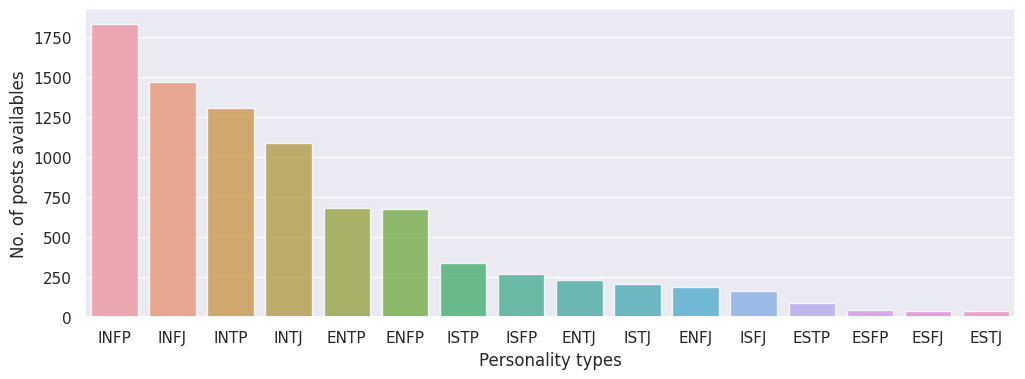

In [64]:
cnt_srs = df['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.savefig(f'../figures/MBTI Kaggle/MBTI Kaggle distribution.png')

plt.show()

In [65]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

## Preprocessing

In [66]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

import nltk

In [67]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/reikiarakawa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/reikiarakawa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/reikiarakawa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/reikiarakawa/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [68]:
# Function to clean text. Remove tagged entities, hyperlinks, emojis
def clean_text(text):
    text = re.sub(r"'", ' ', text)
    text = re.sub(r"\|\|\|", ' ', text)
    text = re.sub(r"\[ font \]", ' ', text)
    text = re.sub(r"#[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"https?://\S+", ' ', text)
    text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', text)
    text = re.sub('\t', ' ',  text)
    text = re.sub('_', ' ', text)
    text = re.sub(r"\.|\,|\;|\:|\[\]|\^|\!|\?|\(|\)", ' ', text)
    text = re.sub(r"[0-9]+", " ", text)
    
    text = re.sub(r" +", ' ', text)
    
    text = text.lower()
    
    #stop Words and lemmatization
    stop_words = set(stopwords.words('english')) 
    
    lemmatizer = WordNetLemmatizer()
    
    word_tokens = word_tokenize(text) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(lemmatizer.lemmatize(w)) 
            
    text = ' '.join(filtered_sentence)
    
    return text
 
df['worked_posts'] = df['posts'].apply(clean_text)

df.head()

,type,posts,worked_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp intj moment sportscenter top ten play pra...
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack post alarming sex boring position...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course say know blessing curse absolu...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...


## Text Length

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


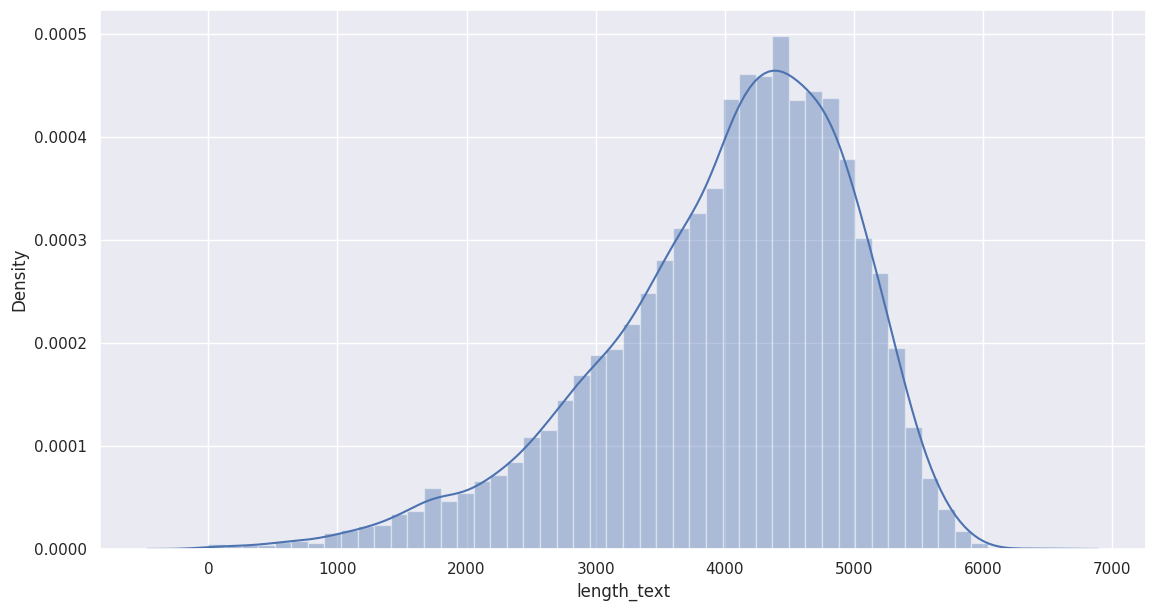

In [69]:
df["length_text"] = df["worked_posts"].apply(len)
plt.figure(figsize=(13.5,7))
sns.distplot(df["length_text"])
plt.savefig(f'../figures/MBTI Kaggle/MBTI Kaggle Processed Text Length.png')
plt.show()

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


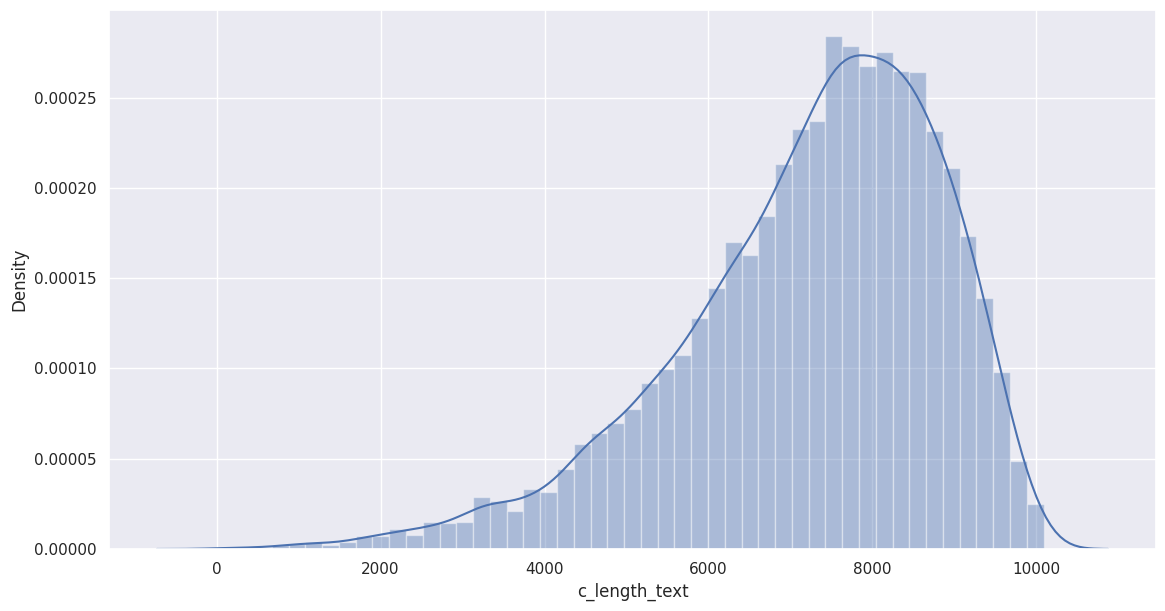

In [70]:
df["c_length_text"] = df["posts"].apply(len)
plt.figure(figsize=(13.5,7))
sns.distplot(df["c_length_text"])
plt.savefig(f'../figures/MBTI Kaggle/MBTI Kaggle Text Length.png')
plt.show()

## Word Count

In [71]:
def word_count(text):
    wc = len(text.split())
    return wc

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


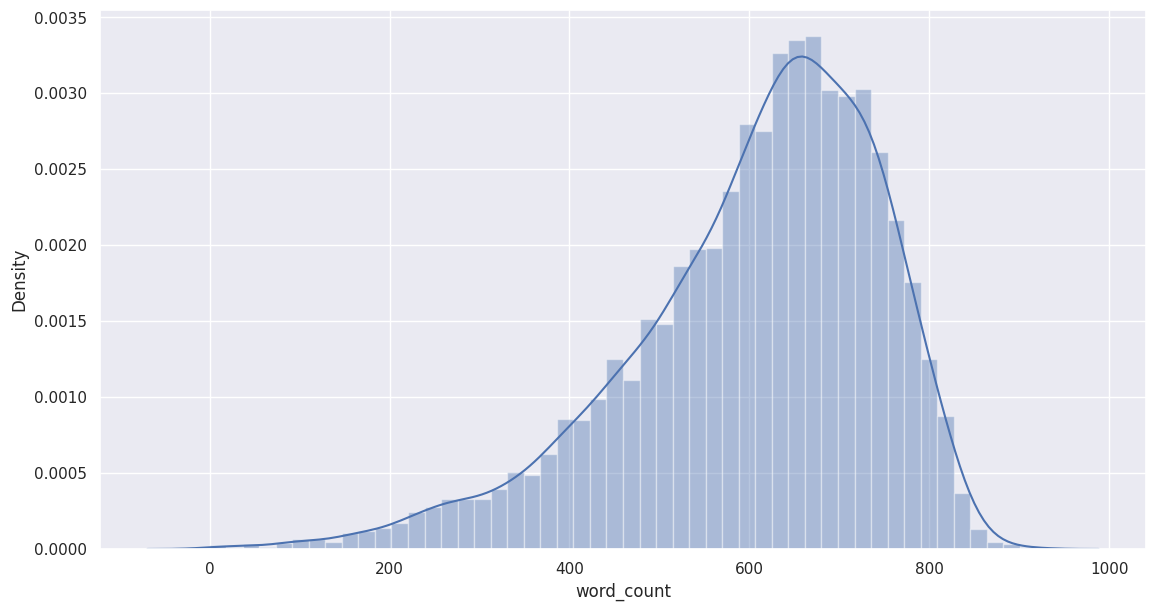

In [72]:
df['word_count'] = df['worked_posts'].apply(word_count)
plt.figure(figsize=(13.5,7))
sns.distplot(df['word_count'])
plt.savefig(f'../figures/MBTI Kaggle/MBTI Kaggle Processed Text Word Count.png')
plt.show()

/home/reikiarakawa/anaconda3/envs/mbti_sn/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


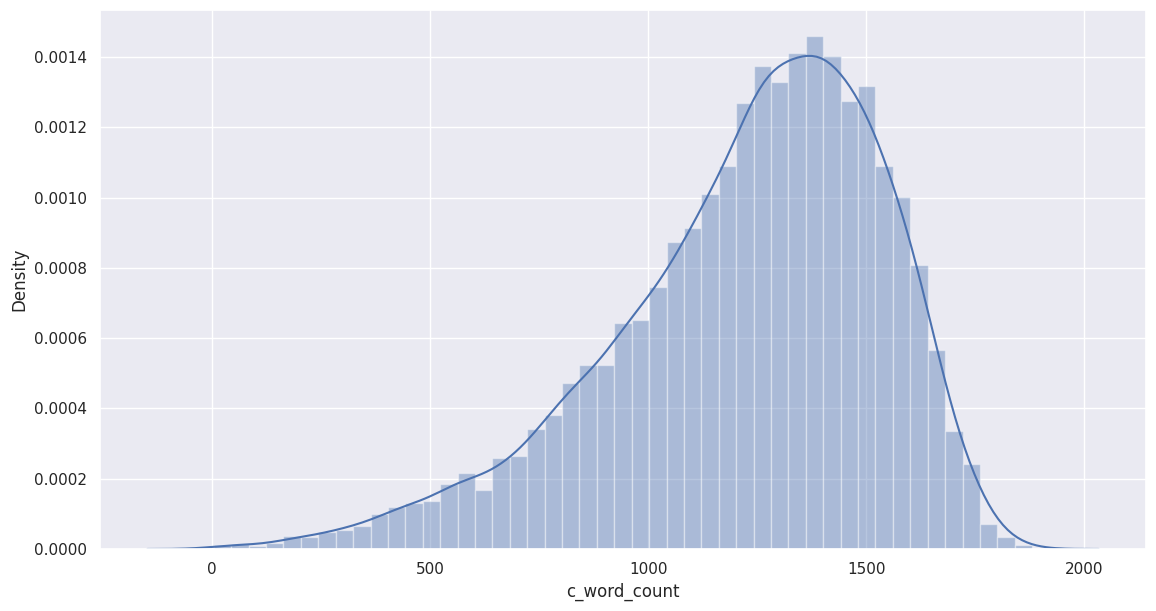

In [73]:
df['c_word_count'] = df['posts'].apply(word_count)
plt.figure(figsize=(13.5,7))
sns.distplot(df['c_word_count'])
plt.savefig(f'../figures/MBTI Kaggle/MBTI Kaggle Text Word Count.png')
plt.show()

## Word Clouds

In [74]:
#Finding the most common words in all suicide notes (preprocessed).
words = list(df["worked_posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('like', 71148),
 ('think', 50986),
 ('people', 48281),
 ('one', 40332),
 ('know', 38337),
 ('really', 35305),
 ('would', 35027),
 ('thing', 34644),
 ('time', 33768),
 ('get', 33353),
 ('feel', 25732),
 ('type', 24153),
 ('make', 23662),
 ('much', 23121),
 ('well', 23113),
 ('say', 22728),
 ('friend', 22212),
 ('love', 21892),
 ('way', 21818),
 ('want', 21212),
 ('good', 20825),
 ('see', 19561),
 ('something', 19550),
 ('also', 18341),
 ('lot', 18203),
 ('go', 17498),
 ('even', 16930),
 ('always', 16815),
 ('life', 16560),
 ('someone', 16268),
 ('could', 15297),
 ('never', 15268),
 ('though', 14682),
 ('find', 14396),
 ('year', 14395),
 ('thought', 13994),
 ('need', 13587),
 ('infp', 13467),
 ('actually', 13234),
 ('person', 13037)]

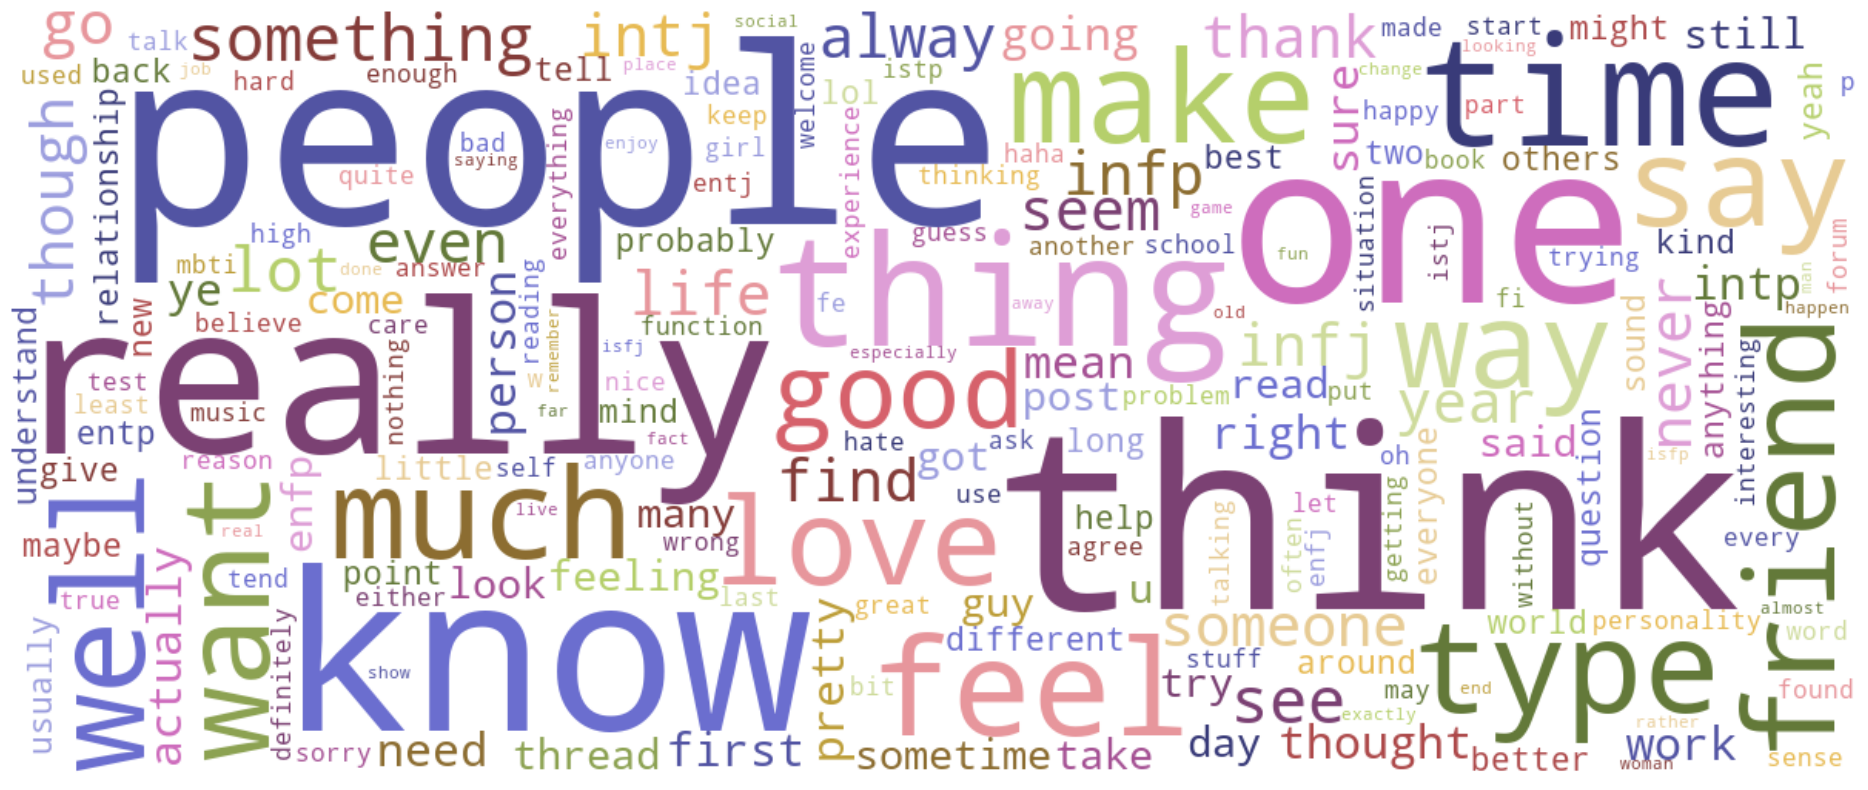

In [75]:
#Plotting the most common words with WordCloud.
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")


plt.savefig(f'../figures/MBTI Kaggle/MBTI Kaggle Processed Text Wordcloud.png')
plt.show()

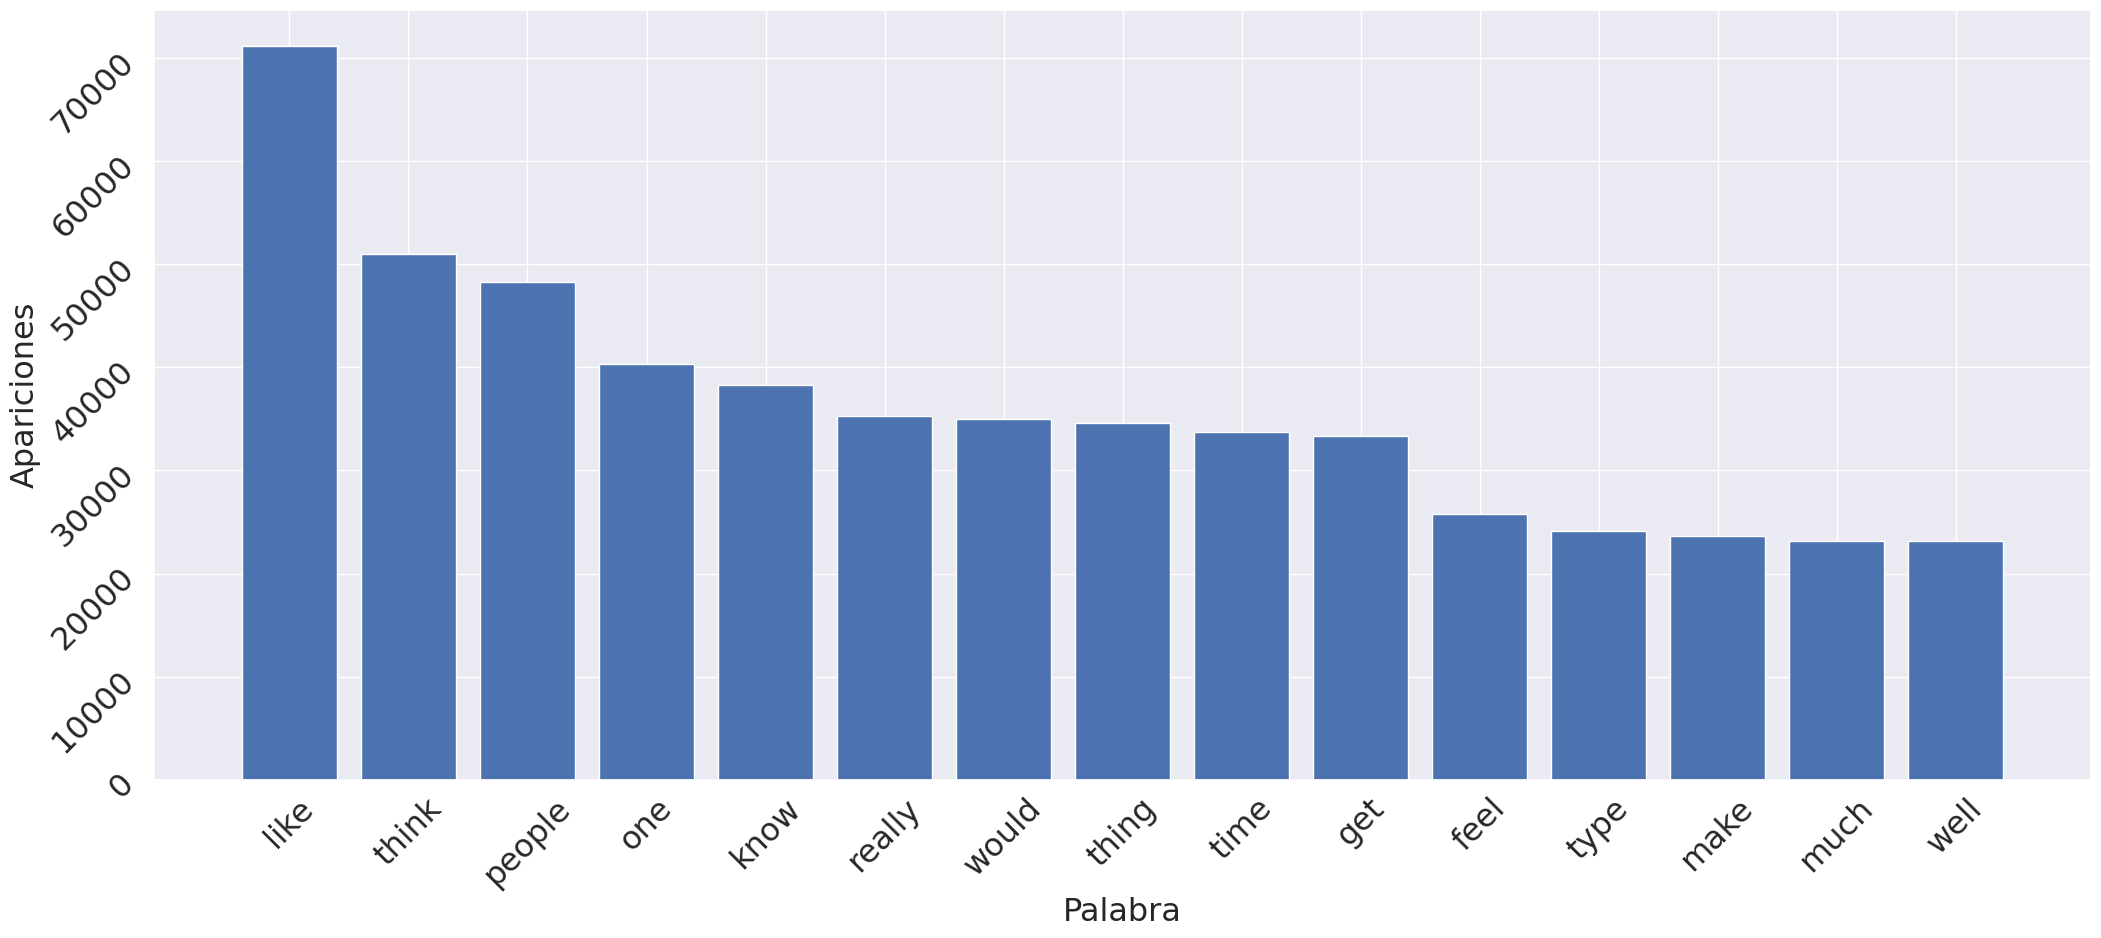

In [76]:
plt.figure(figsize=(25,10))

plt.bar([Counter(words).most_common(40)[i][0] for i in range(15)], 
       [Counter(words).most_common(40)[i][1] for i in range(15)])

plt.xlabel("Palabra", fontsize=23)
plt.ylabel("Apariciones", fontsize=23)
plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23, rotation=45)
plt.savefig(f'../figures/MBTI Kaggle/Word count inMBTI Kaggle after preprocessing.png')

plt.show()

In [77]:
#Finding the most common words in all suicide notes (preprocessed).
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

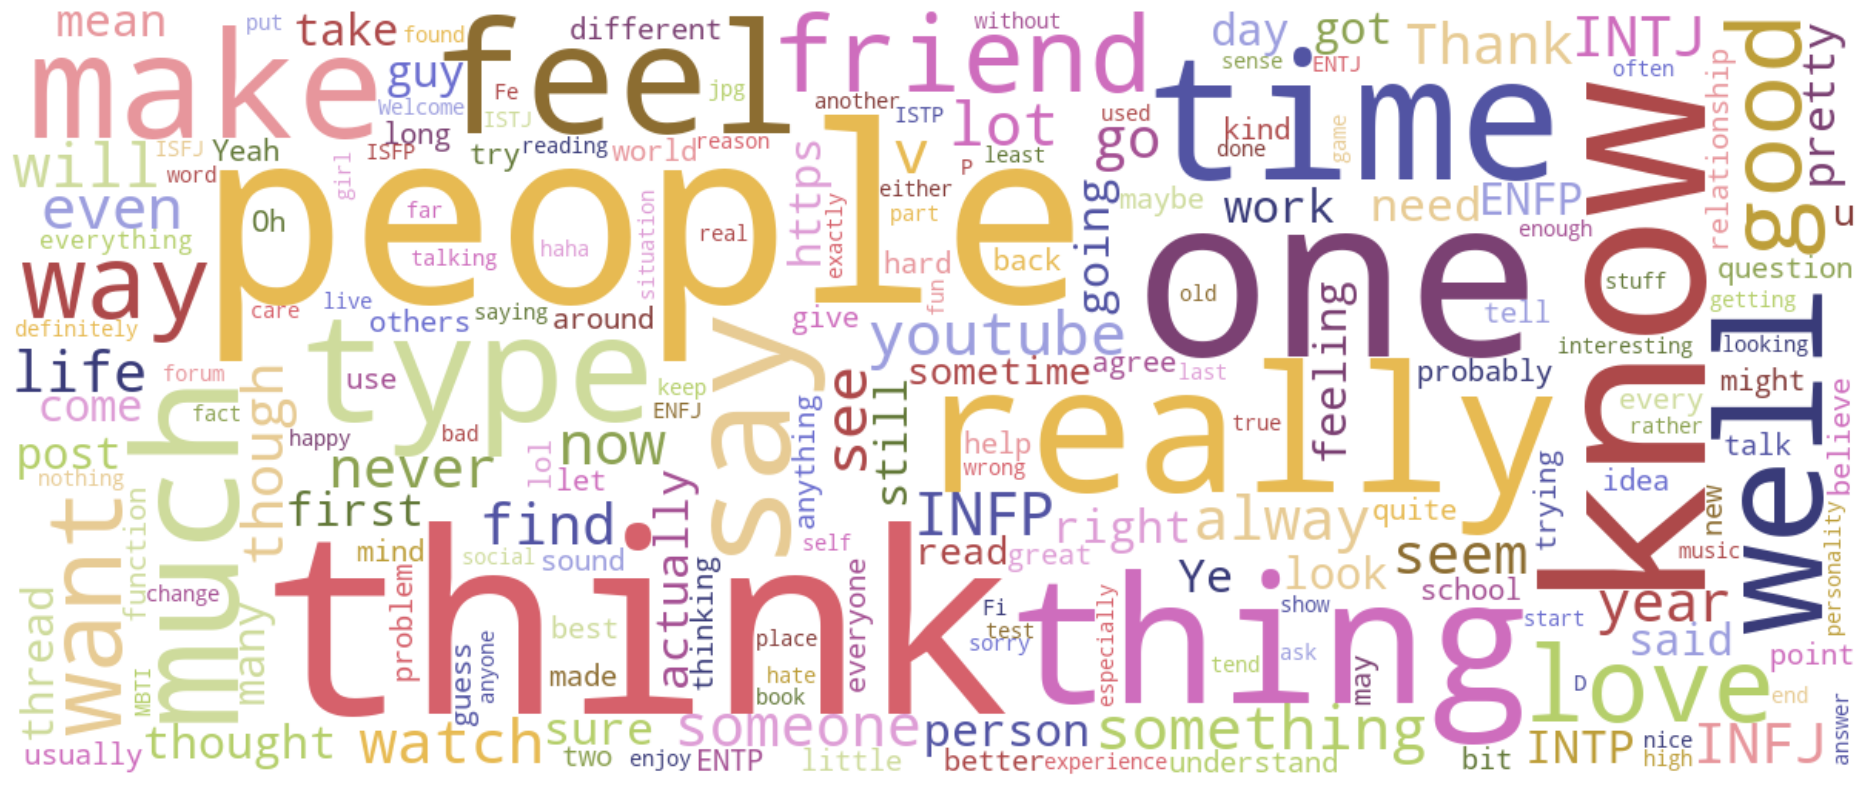

In [78]:
#Plotting the most common words with WordCloud.
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

plt.savefig(f'../figures/MBTI Kaggle/MBTI Kaggle Text Wordcloud.png')
plt.show()

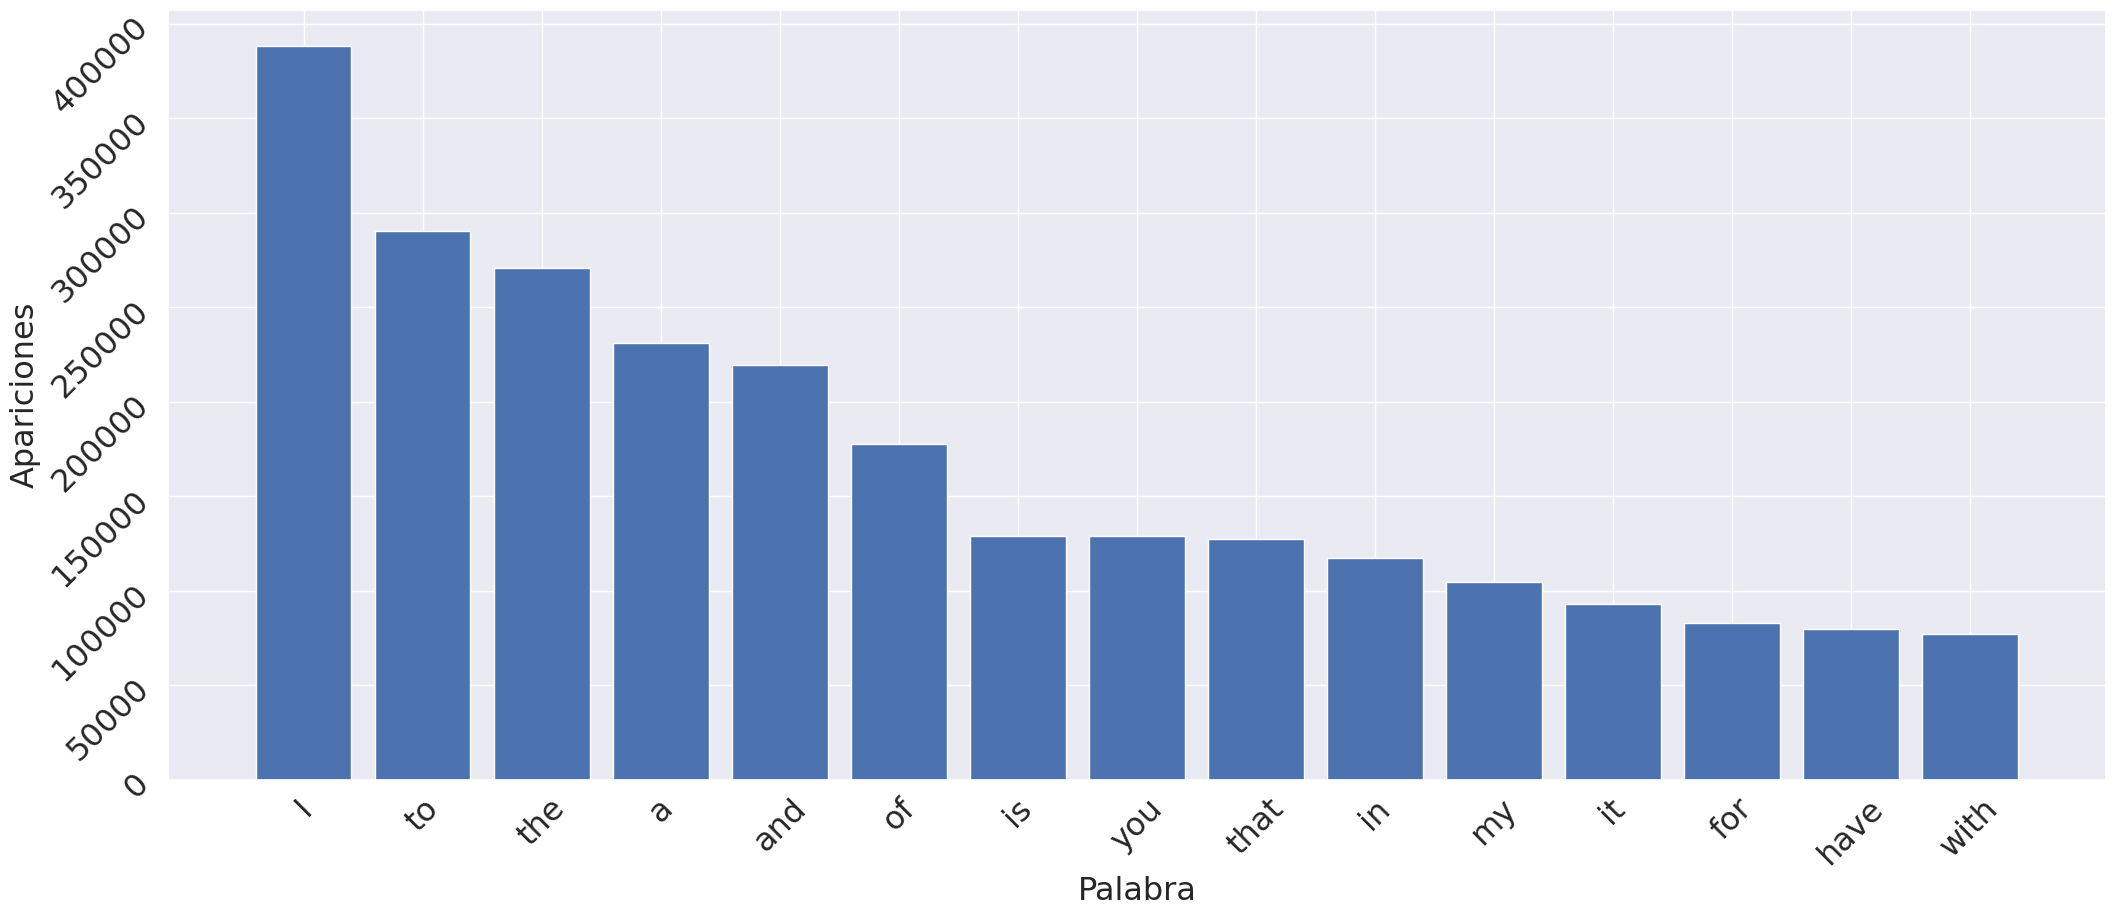

In [79]:
plt.figure(figsize=(25,10))

plt.bar([Counter(words).most_common(40)[i][0] for i in range(15)], 
       [Counter(words).most_common(40)[i][1] for i in range(15)])

plt.xlabel("Palabra", fontsize=23)
plt.ylabel("Apariciones", fontsize=23)
plt.xticks(fontsize=23, rotation=45)
plt.yticks(fontsize=23, rotation=45)

plt.savefig(f'../figures/MBTI Kaggle/Word count in MBTI Kaggle before preprocessing.png')

plt.show()

## Dataset Preparation

In [20]:
labels = ['IE', 'NS', 'TF', 'JP']

In [21]:
label = []
for idx in df.index:
    l = []
    for i in range(len(labels)):
        if df['type'][idx][i] == labels[i][0]:
            l.append(1)
        else:
            l.append(0)
    label.append(l)

df["labels"] = label

for i in range(len(labels)):
    df[labels[i]] = [l[i] for l in label]
    
df.head()

,type,posts,worked_posts,length_text,c_length_text,word_count,c_word_count,labels,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp intj moment sportscenter top ten play pra...,2035,4652,308,556,"[1, 1, 0, 1]",1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack post alarming sex boring position...,3559,7053,561,1170,"[0, 1, 1, 0]",0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one course say know blessing curse absolu...,2857,5265,427,836,"[1, 1, 1, 0]",1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...,3494,6271,526,1064,"[1, 1, 1, 1]",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...,3195,6111,479,967,"[0, 1, 1, 1]",0,1,1,1


In [22]:
df["IE"].value_counts()

1    6676
0    1999
Name: IE, dtype: int64

In [23]:
df["NS"].value_counts()

1    7478
0    1197
Name: NS, dtype: int64

In [24]:
df["TF"].value_counts()

0    4694
1    3981
Name: TF, dtype: int64

In [25]:
df["JP"].value_counts()

0    5241
1    3434
Name: JP, dtype: int64

In [26]:
df.to_csv(f"{DATASETS_PATH}mbti_corregido.csv", index=False)

In [27]:
max_size = 0
for idx in df.index:
    max_size = max(max_size, len(df["worked_posts"][idx].split()))
print(f"max_size: {max_size}")

max_size: 919


## Train/Test Separation

In [28]:
elems = []

for idx in df.index:
    l = []
    l.append(df["worked_posts"][idx])
    l.append(df["labels"][idx])
    
    elems.append(l)

In [29]:
import random

random.seed(1)

random.shuffle(elems)

train_seg = .9


In [30]:
def list_to_num(l):
    return l[0]*8 + l[1]*4 + l[2]*2 + l[3]*1

In [31]:
d = {}
for elem in elems:
    label_list = list_to_num(elem[1])
    
    if not label_list in d:
        d[label_list] = []
    d[label_list].append(elem)

In [32]:
train_list = []
test_list = []

for label in d:
    for elem in d[label][:int(train_seg * len(d[label]))]:
        if len(elem) == 2:
            train_list.append(elem)
        else:
            print(len(elem))
            
    for elem in d[label][int(train_seg * len(d[label])):]:
        if len(elem) == 2:
            test_list.append(elem)
        else:
            print(len(elem))

random.shuffle(train_list)
random.shuffle(test_list)
        

In [33]:
train_df = pd.DataFrame()
train_df["text"] = [e[0] for e in train_list]
train_df["labels"] = [e[1] for e in train_list]
train_df.to_csv(f"{DATASETS_PATH}train.csv", index=False)

test_df = pd.DataFrame()
test_df["text"] = [e[0] for e in test_list]
test_df["labels"] = [e[1] for e in test_list]
test_df.to_csv(f"{DATASETS_PATH}test.csv", index=False)